In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

In [2]:
epochs = 100
lr = 1e-3
batch_size = 64
img_dims = (96,96,3)

data = []
labels = []

In [3]:
image_files = [f for f in glob.glob('dataset_new/**/*', recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)

In [4]:
len(image_files)

4230

In [5]:
for img in image_files:

    image = cv2.imread(img)
    try:
        image = cv2.resize(image, (img_dims[0],img_dims[1]))
        image = img_to_array(image)
        data.append(image)
    except Exception as e:
        continue
    label = img.split(os.path.sep)[-2] # dataset\without_mask\face_1162.jpg
    if label == "without_mask":
        label = 1
    else:
        label = 0
        
    labels.append([label])

In [6]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [7]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)

trainY = to_categorical(trainY, num_classes=2) # [[1, 0], [0, 1], [0, 1], ...]
testY = to_categorical(testY, num_classes=2)

In [8]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

In [9]:
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": 
        inputShape = (depth, height, width)
        chanDim = 1

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model


In [10]:
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)

# compile the model
opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

c:\users\francis\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:367: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [11]:
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1)

c:\users\francis\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
52/52 [==============================] - 34s 628ms/step - loss: 0.4550 - accuracy: 0.8516 - val_loss: 1.2302 - val_accuracy: 0.6520
Epoch 2/100
52/52 [==============================] - 33s 636ms/step - loss: 0.2604 - accuracy: 0.9076 - val_loss: 0.7031 - val_accuracy: 0.6615
Epoch 3/100
52/52 [==============================] - 33s 635ms/step - loss: 0.2114 - accuracy: 0.9291 - val_loss: 0.6186 - val_accuracy: 0.7067
Epoch 4/100
52/52 [==============================] - 30s 581ms/step - loss: 0.1886 - accuracy: 0.9376 - val_loss: 0.9441 - val_accuracy: 0.7185
Epoch 5/100
52/52 [==============================] - 30s 580ms/step - loss: 0.1815 - accuracy: 0.9355 - val_loss: 1.0781 - val_accuracy: 0.7482
Epoch 6/100
52/52 [==============================] - 30s 582ms/step - loss: 0.1431 - accuracy: 0.9461 - val_loss: 0.5911 - val_accuracy: 0.8492
Epoch 7/100
52/52 [==============================] - 30s 581ms/step - loss: 0.1454 - accuracy: 0.9494 - val_loss: 0.4762 - val_accuracy:

52/52 [==============================] - 30s 582ms/step - loss: 0.0250 - accuracy: 0.9900 - val_loss: 0.2088 - val_accuracy: 0.9513
Epoch 58/100
52/52 [==============================] - 30s 583ms/step - loss: 0.0286 - accuracy: 0.9900 - val_loss: 0.1031 - val_accuracy: 0.9727
Epoch 59/100
52/52 [==============================] - 31s 591ms/step - loss: 0.0218 - accuracy: 0.9930 - val_loss: 0.1535 - val_accuracy: 0.9608
Epoch 60/100
52/52 [==============================] - 32s 623ms/step - loss: 0.0287 - accuracy: 0.9894 - val_loss: 0.1213 - val_accuracy: 0.9751
Epoch 61/100
52/52 [==============================] - 32s 607ms/step - loss: 0.0330 - accuracy: 0.9882 - val_loss: 0.2870 - val_accuracy: 0.9299
Epoch 62/100
52/52 [==============================] - 32s 606ms/step - loss: 0.0238 - accuracy: 0.9906 - val_loss: 0.0799 - val_accuracy: 0.9810
Epoch 63/100
52/52 [==============================] - 32s 617ms/step - loss: 0.0281 - accuracy: 0.9894 - val_loss: 0.2132 - val_accuracy: 0.946

In [12]:
model.save('mask_detection_fjr_new.model')

INFO:tensorflow:Assets written to: mask_detection_fjr_new.model\assets


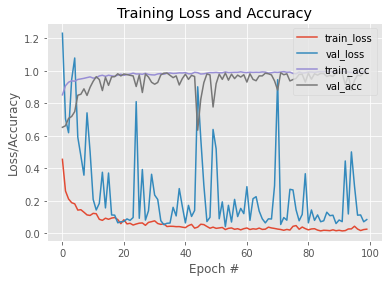

In [13]:
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# save plot to disk
plt.savefig('plot.png')